# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 2 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

In [2]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, лапласа и коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [3]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)
norm_sample = norm_distr.rvs(size = N)
laplace_sample = laplacian_distr.rvs(size = N)
cauchy_sample = cauchy_distr.rvs(size = N)


Постройте график плотности распределения для всех трех распределений на одних осях.

/home/syrnik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/syrnik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/syrnik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

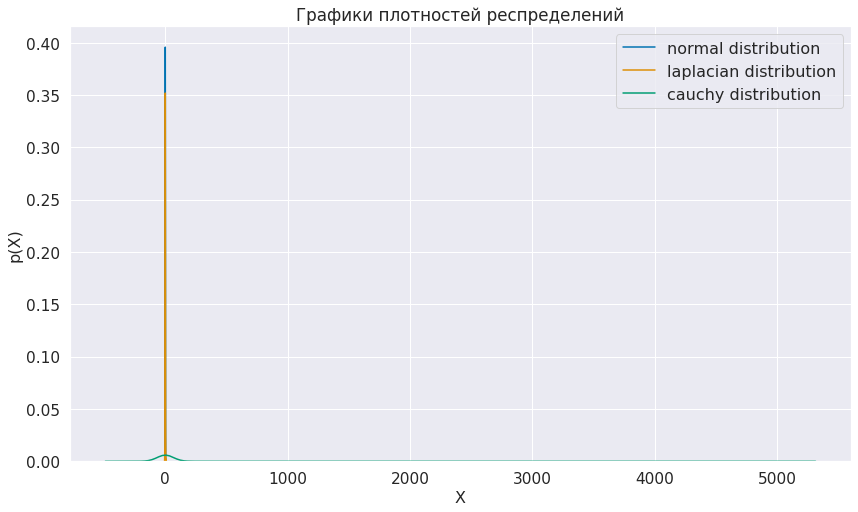

In [20]:
plt.figure(figsize=(14,8))
sns.distplot(norm_sample, hist = False, color = color_for_normal, label = "normal distribution")
sns.distplot(laplace_sample, hist = False, color = color_for_laplace, label = "laplacian distribution")
sns.distplot(cauchy_sample, hist = False, color = color_for_cauchy, label = "cauchy distribution")
plt.legend(loc='best', fontsize=16)
plt.title("Графики плотностей респределений")
plt.xlabel('X', fontsize=16)
plt.ylabel('p(X)', fontsize=16)
plt.show()


Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:**
для распределения Коши, слишком большой разброс случайных значений и большое количество выбросов 

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [5]:
import math

def truncated_mean(sample, alpha=0.3):
    sample.sort()
    cut_size = int(alpha*len(sample))
    new_sample = sample[cut_size : len(sample) - cut_size]
    average = mean(new_sample)
    return average


**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [6]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    u = distr.ppf(1 - alpha)
    x2_p = lambda x: (x ** 2) * distr.pdf(x)
    res = 2 * (quad(x2_p, 0, u)[0] + alpha * (u ** 2)) / ((1 - 2 * alpha) ** 2)
    return res


Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

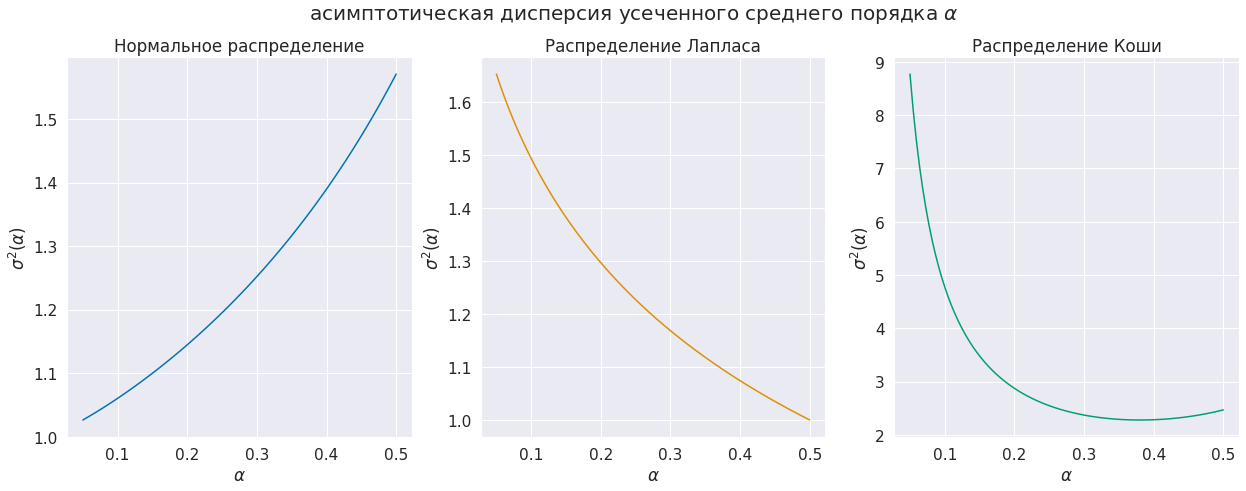

In [7]:
alpha_grid = np.linspace(0.05, 0.49999, 100)
fig, ax = plt.subplots(1, 3, figsize=(21,7))

norm_asymp_disp = [asymp_var(sps.norm(), alpha) for alpha in alpha_grid]
laplace_asymp_disp = [asymp_var(sps.laplace(), alpha) for alpha in alpha_grid]
cauchy_asymp_disp = [asymp_var(sps.cauchy(), alpha) for alpha in alpha_grid]
ax[0].plot(alpha_grid, norm_asymp_disp, color = color_for_normal)
ax[1].plot(alpha_grid, laplace_asymp_disp, color = color_for_laplace)
ax[2].plot(alpha_grid, cauchy_asymp_disp, color = color_for_cauchy)
fig.suptitle("асимптотическая дисперсия усеченного среднего порядка $\\alpha$", fontsize=20)
ax[0].set_title("Нормальное распределение")
ax[1].set_title("Распределение Лапласа")
ax[2].set_title("Распределение Коши")
for ax_i in ax:
    ax_i.set(xlabel = '$\\alpha$', ylabel = '$\sigma^2(\\alpha)$')
plt.show()


Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** 

усеченное среднее порядка 0.5 соответствует медиане выборки

усечённое среднее порядка 0 соответствует $\overline{X}$

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [8]:
norm_average = [np.mean(norm_sample[0:i+1]) for i in range(N)] 
norm_median = [sorted(norm_sample[0:i+1])[i//2] for i in range(N)]
norm_truncated_mean = [truncated_mean(norm_sample[0:i+1], 0.35) for i in range(N)]

laplace_average = [np.mean(laplace_sample[0:i+1]) for i in range(N)] 
laplace_median = [sorted(laplace_sample[0:i+1])[i//2] for i in range(N)]
laplace_truncated_mean = [truncated_mean(laplace_sample[0:i+1], 0.35) for i in range(N)]

cauchy_average = [np.mean(cauchy_sample[0:i+1]) for i in range(N)] 
cauchy_median = [sorted(cauchy_sample[0:i+1])[i//2] for i in range(N)]
cauchy_truncated_mean = [truncated_mean(cauchy_sample[0:i+1], 0.35) for i in range(N)]


**Нормальное распределение**

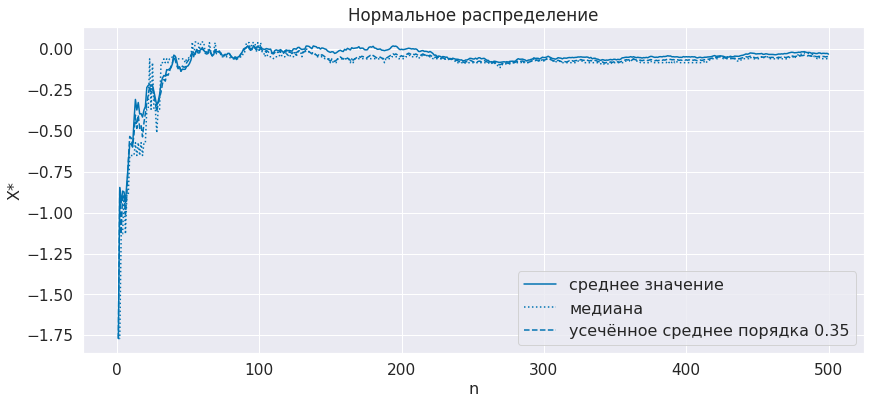

In [9]:
plt.figure(figsize=(14,6))
grid = np.arange(N) + 1
plt.plot(grid, norm_average, color = color_for_normal, label = "среднее значение")
plt.plot(grid, norm_median, color = color_for_normal, ls = ":", label= "медиана")
plt.plot(grid, norm_truncated_mean, color = color_for_normal, ls = "--", label ="усечённое среднее порядка 0.35")
plt.title("Нормальное распределение")
plt.legend(loc='best', fontsize=16)
plt.xlabel('n', fontsize=16)
plt.ylabel('X*', fontsize=16)
plt.show()


**Распределение Лапласа**

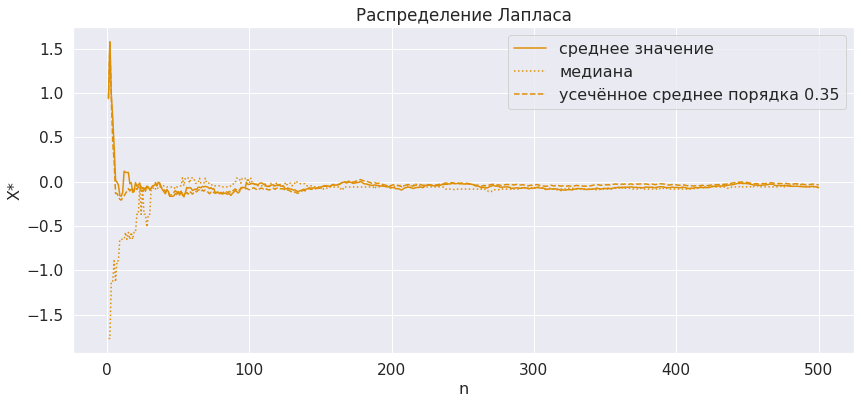

In [10]:
plt.figure(figsize=(14,6))
grid = np.arange(N) + 1
plt.plot(grid, laplace_average, color = color_for_laplace, label = "среднее значение")
plt.plot(grid, norm_median, color = color_for_laplace, ls = ":", label= "медиана")
plt.plot(grid, laplace_truncated_mean, color = color_for_laplace, ls = "--", 
         label ="усечённое среднее порядка 0.35")
plt.title("Распределение Лапласа")
plt.legend(loc='best', fontsize=16)
plt.xlabel('n', fontsize=16)
plt.ylabel('X*', fontsize=16)
plt.show()


**Распределение Коши**

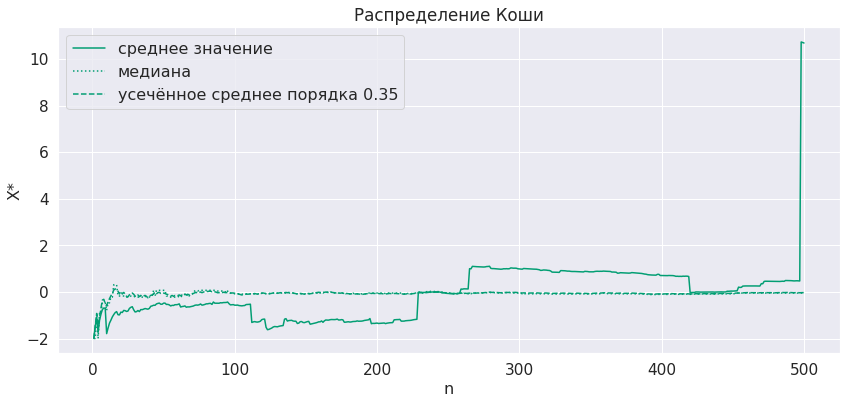

In [11]:
plt.figure(figsize=(14,6))
grid = np.arange(N) + 1
plt.plot(grid, cauchy_average, color = color_for_cauchy, label = "среднее значение")
plt.plot(grid, cauchy_median, color = color_for_cauchy, ls = ":", label= "медиана")
plt.plot(grid, cauchy_truncated_mean, color = color_for_cauchy, ls = "--", 
         label ="усечённое среднее порядка 0.35")
plt.title("Распределение Коши")
plt.legend(loc='best', fontsize=16)
plt.xlabel('n', fontsize=16)
plt.ylabel('X*', fontsize=16)
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:**

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [18]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /home/aigul/Documents/Мат_статистика/практикум/3/winequality-red.csv
100%|████████████████████████████████████████| 101k/101k [00:00<00:00, 1.64MB/s]


In [19]:
import pandas as pd

In [20]:
data = pd.read_csv("winequality-red.csv")

In [21]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [30]:
data['category'] = list('low alcohol' if i <= 10 else ('medium alcohol' if i <= 12 else 'high alcohol') 
                   for i in data['alcohol'])
data.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [37]:
low_mean = data[data.category == "low alcohol"]["residual sugar"].mean()
low_median = data[data.category == "low alcohol"]["residual sugar"].median()

medium_mean = data[data.category == "medium alcohol"]["residual sugar"].mean()
medium_median = data[data.category == "medium alcohol"]["residual sugar"].median()

high_mean = data[data.category == "high alcohol"]["residual sugar"].mean()
high_median = data[data.category == "high alcohol"]["residual sugar"].median()

data_residual_sugar = pd.DataFrame({'mean': [low_mean, medium_mean, high_mean], 
                                    'median': [low_median, medium_median, high_median]})
data_residual_sugar.index = ['low alcohol', 'medium alcohol', 'high alcohol']
data_residual_sugar


,mean,median
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2
high alcohol,2.760993,2.3


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** 

в каждой категории есть выбросы

чем больше содержание алкоголя, тем выше содержание остаточного сахара


Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


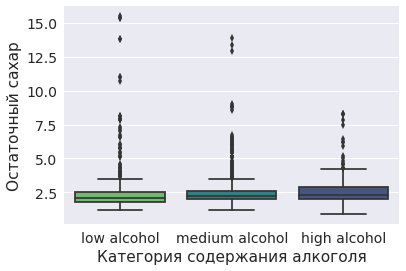

In [38]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
sns.boxplot(x='category', y='residual sugar', data=data, palette=palette)
plt.ylabel('Остаточный сахар')
plt.xlabel('Категория содержания алкоголя')
plt.show()


Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:**

подтверждается наличие выбросов

для оценки лучше использовать медиану, так как среднее сильнее зависит от выбросов и может увеличиться в несколько раз, медиана же лишь сместится на позицию

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

In [ ]:
#YOUR CODE GOES HERE

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [ ]:
#YOUR CODE GOES HERE

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [ ]:
#YOUR CODE GOES HERE

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

Какой можно сделать вывод (напишите в комментариях)?

**Вывод**

 Для каждого значения $\theta$
    (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$,
    посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии
    (количество бутстрепных выборок равно $1000$) этой
    эффективной оценки $\theta$.

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

**Вывод**